<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_01_4_python_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks

**Module 1: Python Preliminaries**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 1 Material

* Part 1.1: Course Overview [[Video]](https://www.youtube.com/watch?v=r7eExQWKzdc&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_1_overview.ipynb)
* Part 1.2: Introduction to Python [[Video]](https://www.youtube.com/watch?v=ZAOOinw51no&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_2_intro_python.ipynb)
* Part 1.3: Python Lists, Dictionaries, Sets and JSON [[Video]](https://www.youtube.com/watch?v=5jZWWLO71bE&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_3_python_collections.ipynb)
* **Part 1.4: File Handling** [[Video]](https://www.youtube.com/watch?v=CPrp1Sm-AhQ&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_4_python_files.ipynb)
* Part 1.5: Functions, Lambdas, and Map/Reduce [[Video]](https://www.youtube.com/watch?v=DEg8a22mtBs&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_5_python_functional.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed. Running the following code will map your GDrive to `/content/drive`.


# Part 1.4: File Handling


Files often contain the data that you use to train your AI programs. Once trained, your models may use real-time data to form predictions. These predictions might be made on files too. Regardless of predicting or training, file processing is a vital skill for the AI practitioner.

There are many different types of files that you must process as an AI practitioner. Some of these file types are listed here:

- **CSV files** (generally have the .csv extension) hold tabular data that resembles spreadsheet data.
- **Image files** (generally with the .png or .jpg extension) hold images for computer vision.
- **Text files** (often have the .txt extension) hold unstructured text and are essential for natural language processing.
- **JSON** (often have the .json extension) contain semi-structured textual data in a human-readable text-based format.
- **H5** (can have a wide array of extensions) contain semi-structured textual data in a human-readable text-based format.
- **Numpy** (npy) PyTorch stores neural networks as Numpy files.
- **Audio Files** (often have an extension such as .au or .wav) contain recorded sound.

Data can come from a variety of sources. In this class, we obtain data from three primary locations:

- **Your Hard Drive** - This type of data is stored locally, and Python accesses it from a path that looks something like: **c:\data\myfile.csv or /Users/jheaton/data/myfile.csv**.
- **The Internet** - This type of data resides in the cloud, and Python accesses it from a URL that looks something like:
  https://data.heatonresearch.com/data/t81-558/iris.csv.
- **Google Drive (cloud)** - If your code in Google CoLab, you use GoogleDrive to save and load some data files. CoLab mounts your GoogleDrive into a path similar to the following: **/content/drive/My Drive/myfile.csv**.

## Read a CSV File

Python programs can read CSV files with Pandas. We will see more about Pandas in the next section, but for now, its general format is:


In [1]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv")

The above command loads [Fisher's Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) from the Internet. It might take a few seconds to load, so it is good to keep the loading code in a separate Jupyter notebook cell so that you do not have to reload it as you test your program. You can load Internet data, local hard drive, and Google Drive data this way.

Now that the data is loaded, you can display the first five rows with this command.


In [2]:
df[0:5]

sepal_l  sepal_w  petal_l  petal_w      species
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa

## Read (stream) a Large CSV File

Pandas will read the entire CSV file into memory. Usually, this is fine. However, at times you may wish to "stream" a huge file. Streaming allows you to process this file one record at a time. Because the program does not load all of the data into memory, you can handle huge files. The following code loads the Iris dataset and calculates averages, one row at a time. This technique would work for large files.


In [3]:
import codecs
import csv
import urllib.request

import numpy as np

url = "https://data.heatonresearch.com/data/t81-558/iris.csv"
urlstream = urllib.request.urlopen(url)
csvfile = csv.reader(codecs.iterdecode(urlstream, "utf-8"))
next(csvfile)  # Skip header row
sum = np.zeros(4)
count = 0

for line in csvfile:
    # Convert each row to Numpy array
    line2 = np.array(line)[0:4].astype(float)

    # If the line is of the right length (skip empty lines), then add
    if len(line2) == 4:
        sum += line2
        count += 1

# Calculate the average, and print the average of the 4 iris
# measurements (features)
print(sum / count)

[5.84333333 3.05733333 3.758      1.19933333]


This code snippet is a neat example of fetching, processing, and calculating statistics from a remote dataset, specifically the famous Iris dataset. Let's break down what each part of the script is doing:

1. **Import Libraries:**
   - `codecs` and `csv` for handling CSV file operations.
   - `urllib.request` for fetching data from a URL.
   - `numpy` (as `np`) for numerical operations.

2. **Fetch the Dataset:**
   - The dataset is located at the URL `"https://data.heatonresearch.com/data/t81-558/iris.csv"`.
   - `urllib.request.urlopen(url)` opens a connection to this URL and retrieves the dataset.

3. **Read the CSV File:**
   - `csv.reader(codecs.iterdecode(urlstream, "utf-8"))` is used to read the CSV file. The data is decoded from UTF-8 format, ensuring correct character interpretation.

4. **Skip Header Row:**
   - `next(csvfile)` is used to skip the first line of the CSV file, which is typically the header.

5. **Initialize Sum and Count Variables:**
   - `sum = np.zeros(4)` initializes a NumPy array of zeros with a length of 4. This is used to store the cumulative sum of the numeric values in the dataset.
   - `count` is initialized to 0 and will keep track of how many rows (data points) are processed.

6. **Process Each Line:**
   - The script iterates over each line in the CSV file.
   - `np.array(line)[0:4].astype(float)` converts the first 4 elements of each line to a NumPy array of floats. These represent the numeric features of the Iris dataset.
   - The script checks if the line is of the correct length (4 elements) to ensure it's not processing empty or malformed lines.

7. **Calculate Sum and Count:**
   - If the line has 4 elements, it adds these values to the `sum` array and increments the `count`.

8. **Compute and Print the Average:**
   - After processing all lines, the script calculates the average of the features by dividing `sum` by `count`.
   - It prints out the average of the 4 measurements (features) of the Iris dataset.

In essence, this script is computing the mean values for each of the four numerical features in the Iris dataset by fetching the data from a remote source, parsing it, and then applying a basic statistical operation. It's like a digital version of a field biologist, collecting and analyzing data from the wilds of the internet! 🌸💻📊

In this script, the `codecs` module is used in conjunction with the `csv` module to handle the decoding of the data fetched from the URL. Here's a closer look at why `codecs` is important in this context:

1. **Handling Character Encoding:**
   - The primary purpose of importing `codecs` is to ensure proper handling of character encoding. The data retrieved from the URL might be encoded in a specific format (like UTF-8, which is very common).
   - The `codecs.iterdecode` function is used to decode the streamed data (`urlstream`) from its encoded format (UTF-8 in this case) into a format that Python can work with more easily (like a string).

2. **CSV Compatibility:**
   - The `csv.reader` expects a file-like object or an iterable of strings. However, the data received from `urllib.request.urlopen` is a stream of bytes.
   - `codecs.iterdecode` converts this stream of bytes into an iterable of strings, making it compatible with `csv.reader`.

3. **Handling Different Data Sources:**
   - When fetching data from various sources on the internet, you might encounter different character encodings. Using `codecs` ensures that your script can handle these variations gracefully.

4. **Avoiding Encoding Errors:**
   - Without proper decoding, attempting to read the CSV file directly from a byte stream could result in encoding errors, especially if the data contains non-ASCII characters.

In summary, `codecs` is used here as a bridge between the byte stream received from the internet and the string-based processing expected by the `csv` module. It's a bit like having a translator who can convert the language of the web (bytes in various encodings) into the language of your Python script (Unicode strings). 🌐➡️🐍

## Read a Text File

The following code reads the [Sonnet 18](https://en.wikipedia.org/wiki/Sonnet_18) by [William Shakespeare](https://en.wikipedia.org/wiki/William_Shakespeare) as a text file. This code streams the document and reads it line-by-line. This code could handle a huge file.


In [4]:
import codecs
import urllib.request

url = "https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, "utf-8"):
        print(line.rstrip())

Sonnet 18 original text
William Shakespeare

Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wander'st in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this and this gives life to thee.


## Read an Image

Computer vision is one of the areas that neural networks outshine other models. To support computer vision, the Python programmer needs to understand how to process images. For this course, we will use the Python PIL package for image processing. The following code demonstrates how to load an image from a URL and display it.


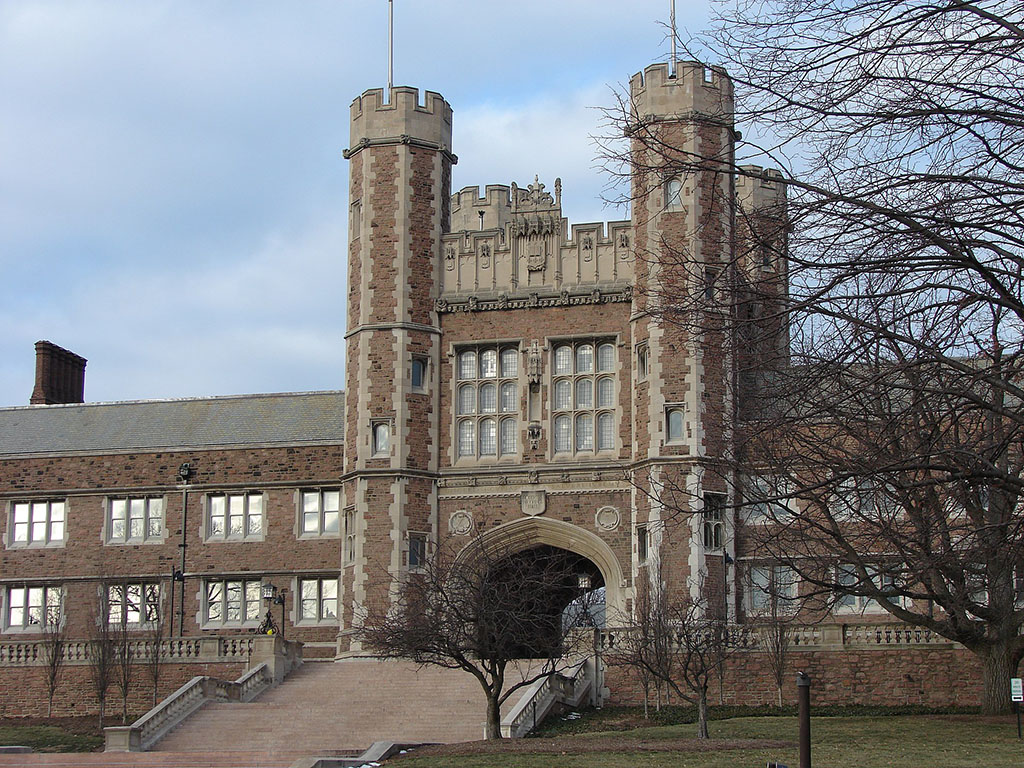

In [5]:
%matplotlib inline
from io import BytesIO

import requests
from PIL import Image

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img